# Linear Regression

In [4]:
import numpy as np
import matplotlib.pylab as plt

In [5]:
from __future__ import division
X = 2*np.random.rand(100,1)

y= 4+3*X + np.random.rand(100,1)

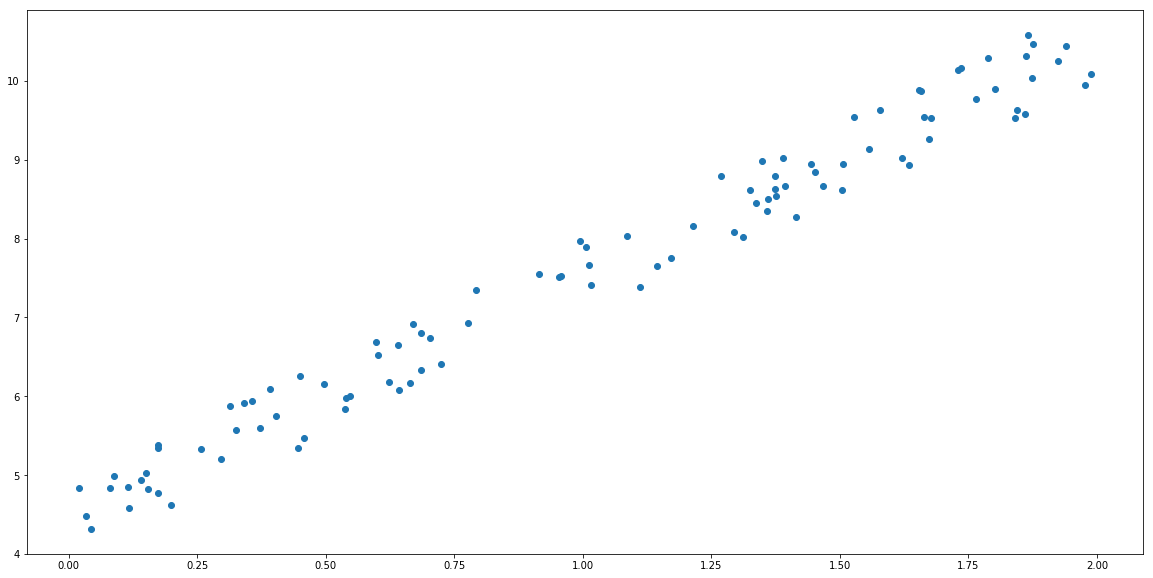

In [10]:
plt.figure(figsize=(20,10))
plt.scatter(X, y)
plt.show()

In [11]:
X_b = np.c_[np.ones((100,1)),X]

In [13]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [14]:
theta_best

array([[4.55162747],
       [2.97153548]])

In [19]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.55162747],
       [10.49469843]])

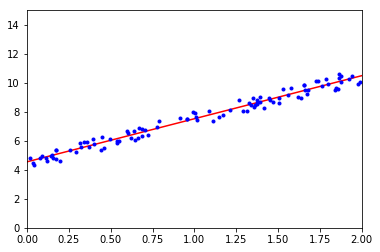

In [21]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

**The equivalent code using Scikit-learn**

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lin_reg = LinearRegression()

In [29]:
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
lin_reg.intercept_, lin_reg.coef_

(array([4.55162747]), array([[2.97153548]]))

In [31]:
lin_reg.predict(X_new)

array([[ 4.55162747],
       [10.49469843]])

# Computational Complexity

**The Normal Equation gets very slow when the number of features grows large**

# Gradient Descent

Gradient Descent is a very generic optimization algorithm capable of finding optimal solutions to wide range of problem.

The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function

**Partial derivatives of the cost function**

$\frac{\delta}{\delta\theta_j}MSE(\theta) = \frac{2}{m}\sum^{m}\limits_{i=1}\lgroup\theta^T \cdot x^{i}-y^i\rgroup x^i_j$

**When using Gradient Descent make sure that all the features have a small scales(eg. using scikit-learn StandardScaler class), or else it will take much longer to converge**

$\theta^{(next step)} = \theta - \eta \nabla_\theta MSE(\theta)$

**Implementation of this algorithm:**

In [32]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

In [33]:
theta = np.random.randn(2,1) # random initialization normal distribution

In [34]:
for iteration in range(n_iterations):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta = theta-eta*gradients

In [35]:
theta

array([[4.55162747],
       [2.97153548]])